# Finite Elements Lab 1 Worksheet

In [1]:
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/ngcm/training-public/master/ipython_notebook_styles/ngcmstyle.css'
HTML(url=css_file)

## 1d problem

The temperature $T$ of a bar of length $1$ at equilibrium satisfies

$$
  \partial_{xx} T + f(x) = 0.
$$

The heat source is given by $f(x)$. We'll hold the temperature fixed at the right edge by setting $T(1) = 0$. We'll allow heat to conduct through the left edge by setting $\partial_x T(0) = 0$.

Dealing with the second derivative is a problem, so we want to remove some derivatives from the formulation. Introducing a *weighting* function $w(x)$. Multiply the equation by $w$ and integrate by parts to get

$$
  \left[ \partial_x T(x) w(x) \right]_0^1 - \int_0^1 \text{d}x \, \partial_x T(x) \partial_x w(x) = - \int_0^1 \text{d}x \, f(x) w(x).
$$

Putting in the boundary conditions gives

$$
  \int_0^1 \text{d}x \, \partial_x T(x) \partial_x w(x) = \int_0^1 \text{d}x \, w(x) f(x).
$$

This is the **weak form**. It can be proved that solutions of the *strong* form (with two derivatives) are also solutions of the weak form, and vice versa.

### Function representation

To get an approximate solution we split the domain into intervals, or elements. To start we'll choose $[0, 1/2]$ and $[1/2, 1]$, which means there are nodes at $\{ 0, 1/2, 1 \}$. We want to represent all unknown functions ($T, w$) on these elements. We'll introduce some *shape* or *basis* functions $N_A(x)$ and write, for example, 

$$
  T(x) = \sum_A T_A N_A(x).
$$

Here $A$ is a counter associated with the nodes, so here $A = \{ 0, 1, 2 \}$: the nodes are labelled $x_A$. The shape function $N_A(x)$ is $1$ at the associated node, and $0$ at all other nodes. If we choose the shape functions to be piecewise linear then the three shape functions therefore look like

$$
\begin{align}
  N_0(x) &= \begin{cases} 1 - 2 x, & 0 \le x \le 1/2 \\ 0, & 1/2 \le x \le 1, \end{cases}, \\
  N_1(x) &= \begin{cases} 2 x, & 0 \le x \le 1/2 \\ 2 - 2 x, & 1/2 \le x \le 1, \end{cases}, \\
  N_2(x) &= \begin{cases} 0, & 0 \le x \le 1/2 \\ 2 x - 1, & 1/2 \le x \le 1. \end{cases}
\end{align}
$$

In [2]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

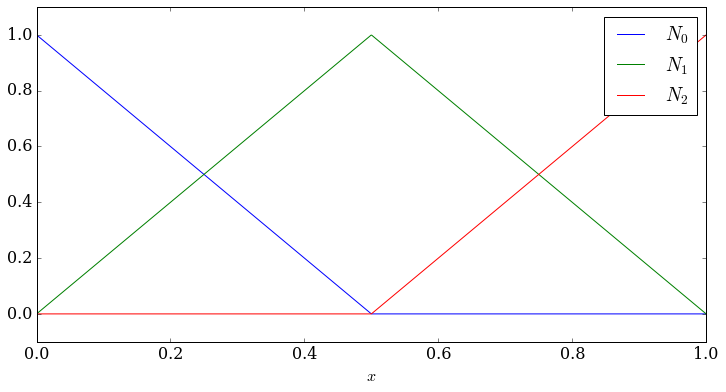

In [3]:
x = numpy.linspace(0, 1, 1000)
N0 = numpy.where(x <= 0.5, 1-2*x, numpy.zeros_like(x))
N1 = numpy.where(x <= 0.5, 2*x, 2-2*x)
N2 = numpy.where(x <= 0.5, numpy.zeros_like(x), 2*x-1)
pyplot.figure()
pyplot.plot(x, N0, label=r"$N_0$")
pyplot.plot(x, N1, label=r"$N_1$")
pyplot.plot(x, N2, label=r"$N_2$")
pyplot.xlabel(r"$x$")
pyplot.ylim(-0.1, 1.1)
pyplot.legend();

With this definition of the shape functions, the coefficients are given exactly as (e.g.) $T_A = T(x_A)$. **NOTE**: because we have imposed the boundary condition $T(1) = 0$ we must have that $T_2 \equiv 0$, so we do not need to calculate $T_2$.

We can now write out the weak form of the problem as

$$
  \sum_A \sum_B T_A w_B \int_0^1 \text{d}x \, \partial_x N_A(x) \partial_x N_B(x) = \sum_B w_B \int_0^1 \text{d}x \, N_A(x) f(x).
$$

This has to be true for *any* choice of weight function, so for *any* coefficients $w_B$. This is true only if

$$
  \sum_A T_A \int_0^1 \text{d}x \, \partial_x N_A(x) \partial_x N_B(x) = \int_0^1 \text{d}x \, N_A(x) f(x).
$$

This can be written as a matrix problem:

$$
  K {\bf T} = {\bf F}.
$$

The coefficients of the **stiffness matrix** $K$ are given by

$$
  K_{AB} = \int_0^1 \text{d}x \, \partial_x N_A(x) \partial_x N_B(x).
$$

The coefficients of the **force vector** $F$ are given by

$$
  F_{A} = \int_0^1 \text{d}x \, N_A(x) f(x).
$$

### Tasks

1. Compute (analytically) the coefficients of the stiffness matrix given the shape functions above.
2. Compute (analytically) the coefficients of the force vector when $f(x) = x$.
3. Solve (numerically) for $T_A$ and plot the resulting solution for $T(x)$. Compare against the exact solution $T(x) = (1 - x^3) / 6)$.

## The element viewpoint

This works surprisingly well, but it's clearly going to get very complex when the number of elements (or nodes) gets large as we try to improve accuracy. To work systematically with large numbers of elements, we need to consider one at a time.

First, note that in any element there's only two shape functions that are not zero: those that correspond to the nodes at the edge of the element. We'll call these shape functions $N_1$ and $N_2$.

Second, note that by doing a coordinate transformation, we can take *any* element from the interval $[ x_A, x_{A+1} ]$ to the interval $[ \xi_1, \xi_2 ]$ where we fix (by convention) $\xi_1 = -1$ and $\xi_2 = 1$. We have

$$
\begin{align}
  \xi(x) &= \frac{2 x - x_A - x_{A+1}}{x_{A+1} - x_{A}}, \\
  x(\xi) &= \frac{(x_{A+1} - x_{A}) \xi + x_A + x_{A+1}}{2}.
\end{align}
$$

We can now write the shape functions in terms of the *reference coordinates* $\xi$ as

$$
  N_a(\xi) = \tfrac{1}{2} \left( 1 + \xi_a \xi \right), \qquad a = 1, 2.
$$

As above we needed the derivatives of the shape function when computing coefficients, we note that

$$
  \partial_{\xi} N_a = \frac{(-1)^a}{2}, \qquad a = 1, 2.
$$

We will also need to change coefficients of vectors which will require a Jacobian, which needs derivatives of the coordinate transformation. This needs

$$
\begin{align}
  \partial_x \xi &= \frac{2}{x_{A+1} - x_{A}}, \\
  \partial_{\xi} x &= \frac{(x_{A+1} - x_{A})}{2}.
\end{align}
$$


With this information we can compute the stiffness matrix $k^e_{ab}$ for the single element $e$. This gives

$$
\begin{align}
  k^e_{ab} &= \int_{x_A}^{x_{A+1}} \text{d}x \, \partial_x N_a \partial_x N_b \\
  &= \int_{-1}^{+1} \text{d}\xi \, \partial_{\xi} x \, \partial_{x} N_a \partial_{x} N_b \\
  &= \int_{-1}^{+1} \text{d}\xi \, \left(\partial_{\xi} x\right)^{-1} \, \partial_{\xi} N_a \partial_{\xi} N_b \\
  &= \frac{(-1)^{a+b}}{x_{A+1} - x_A}.
\end{align}
$$

This is incredibly useful: there's no need to do any integrals at all.

The element force vector is given by

$$
\begin{align}
  f^e_{a} &= \int_{x_A}^{x_{A+1}} \text{d}x \, N_a f(x) + \text{boundary terms}
  & = \int_{x_A}^{x_{A+1}} \text{d}x \, N_a f(x).
\end{align}
$$

This is specific to our choice of boundary conditions: normally there would be extra terms.

To evaluate this it's convenient to write $f(x) = \sum_a f_a N_a$ within the element, where $f_a = f(x(\xi_a))$. With the simple shape functions we have here, we get

$$
\begin{equation}
  f^e_{a} = \frac{x_{A+1} - x_{A}}{6} \begin{pmatrix} 2 f_1 + f_2 \\ f_1 + 2 f_2 \end{pmatrix}.
\end{equation}
$$

### Linking elements to equations

In the end we want to construct a linear (matrix) equation to give us the solution $T_A$ at all nodes $A$ where it isn't enforced by the boundary conditions (which in the problem above is all nodes except the right-hand boundary). We note that each *interior* node is linked to two elements, so contributions from the element matrix may affect more than one equation. To keep track of this, we construct the **location matrix** or **location array** $LM$ which, given the node number $a = 1, 2$ and the element number $e$ returns the associated equation number.

In our case we have

$$
  A = LM(a, e) = \begin{cases} e & a = 1 \\ e+1 & a = 2 \end{cases}
$$

for $e = 0, 1, \dots, N_{\text{elements}}-1$. For the final element we have to change things, as the final node is not to be included. Here we'll set the equation number $A$ to be $-1$.

In [8]:
Nelements = 4

LM = numpy.zeros((2, Nelements))
for e in range(Nelements):
    LM[0, e] = e
    LM[1, e] = e+1
LM[1, -1] = -1 # Right hand node of final element is not considered thanks to BC.

Now the global stiffness matrix and force vector can be assembled: for each element $e$ we construct $k^e_{ab}$ and add:

$$
\begin{align}
  K_{LM(a, e) \, LM(b, e)} &= K_{LM(a, e) \, LM(b, e)} + k^e_{ab}, & a, b &= 1, 2, \\
  f_{LM(a, e)} &= f_{LM(a, e)} + f^e_a, & a &= 1, 2.
\end{align}
$$

### Algorithm

This gives our full algorithm:

1. Set number of elements $N_{\text{elements}}$.
2. Set node locations $x_A, A = 0, \dots, N_{\text{elements}}$.
3. Set up the location matrix $LM$.
4. Set up arrays of zeros for the global stiffness matrix (size $N_{\text{elements}} \times N_{\text{elements}}$) and force vector (size $N_{\text{elements}}$).
5. For each element:

    1. Form the element stiffness matrix $k^e_{ab}$.
    2. Form the element force vector $f^e_a$.
    3. Add the contributions to the global stiffness matrix and force vector
    
6. Solve $K {\bf T} = {\bf F}$.

### Task

1. Write a finite element solver that takes the number of elements and the function $f(x)$, forms a uniformly spaced grid, and solves for $T$.
2. Check that it returns the same result as above when applied to two elements with $f(x) = x$.
3. Apply it to the case with $f(x) = x^2$ with the same boundary conditions: the exact solution is $(1 - x^4) / 12$. Compute the error in the 2-norm and show how it converges.